# 密度行列と混合状態


Qiskitのテキストブックの大部分において、[量子ビット状態を表現する](../ch-states/representing-qubit-states.ipynb)の章で紹介した状態ベクトル表記を使って量子ビットの状態を表現してきました。この表現は、それぞれ確率振幅を持つ基底状態の[線形結合](../ch-appendix/linear_algebra.ipynb#Spanning-Sets,-Linear-Dependence,-and-Bases)として常に表現できる状態を扱う場合には便利な表現方法です。しかし、量子計算や量子通信では、量子ビットの状態をある基底の線形結合で書き表すことができず、それぞれ発生確率を持つ複数の状態のアンサンブル（統計的混合物）で表現しなければならない場面が多く存在します。

例えば、アリスがボブに$| + \rangle$という状態を送りたい場合を考えてみましょう。このとき、通信路のノイズにより、ある確率$p$で状態の相対位相が反転する可能性があるとします。つまり、ボブは「反転した」状態 $| - \rangle$ (確率 $p$) になるか、目的の状態 $| + \rangle$ (確率 $1 - p$) になるか、どちらかになる可能性があるということです。ここでボブの状態は、$| + \rangle$ **か** $| - \rangle$のどちらかであり、その2つの量子重ね合わせではないことに注意してください。したがって、ボブの量子ビットが、例えばゲートをかけて測定した後にどうなるかを知りたければ、この2つの場合を別々に考えなければなりません。2つの状態しか扱わないのであれば、これはそれほど難しいタスクではないかもしれませんが、可能な状態の数がより多くなる状況では、それぞれの状態がどのように進化していくかを個別に追跡することは非現実的となり得ます。これからこの章で説明するように、このようなときに密度行列表現が役に立つのです。

密度行列は、簡単に言えば、量子状態を表現する代替手段です。しかし、状態ベクトル表現とは異なり、この形式では、これまで扱ってきた単純な量子状態（*純粋状態*）と、純粋状態のアンサンブルからなる*混合状態*の両方を同じ数学的言語で表現することが可能です。

ここでは、密度行列表記法を正式に紹介し、純粋状態と混合状態の両方を表現するためにどのように使われるかを見ていくことにします。

## 目次
1. [純粋状態](#pure)    
    1.1 [練習問題](#ex1)
2. [混合状態](#mixed)    
    2.1 [例](#example)    
    2.2 [練習問題](#ex2)    
3. [密度行列の性質](#properties)    
4. [縮約密度行列](#reduced)    
    4.1 [練習問題](#ex4)
5. [ブロッホ球における混合状態](#bloch)


## 1. 純粋状態 <a id="pure"></a>

純粋状態とは、各時点での量子状態を正確に定義できる状態のことです。例えば、1つの量子ビット $|q \rangle $ を状態 $ | 0 \rangle $ で初期化し、アダマールゲートを適用すると、最終的な状態は次のようになることが分かっています。

$$ 
| q \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = | + \rangle 
$$

この状態を測定するとき、結果は確率的であることがわかります。状態 $|0 \rangle $ を $50 \% $ の確率で測定し、状態 $|1 \rangle $ を $50 \% $ の確率で測定することになります。しかし、量子ビットの初期化プロセスとアダマールゲートが理想的であれば、量子状態は必ず $ | + \rangle $ になると測定を行う**前に** 100% 確実に言うことができるのです。したがって、この量子状態がどうなるかという不確実性がないので、$|q \rangle$は純粋状態であると言えます。

一般に、従来の状態ベクトル表記では$n$量子ビットの純粋状態を次のように表現できることが分かっています。

$$ | \psi \rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, $$

ここで $ N = 2^{n} $ です。 この純粋な量子状態を表現する別の方法として、行列の形で表現するものがあります。これは、次のように定義される密度演算子表現を用いることで実現できます。

$$ \rho \equiv  | \psi \rangle \langle \psi | $$

ここで、$| \psi \rangle \langle \psi | $ は状態 $ \psi $ とそれ自体の[外積](../ch-gates/proving-universality.ipynb#outer)を表します。


$$ 
\begin{aligned}
& \rho = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_N \end{bmatrix} \begin{bmatrix} \alpha_0^* & \alpha_1^* & \dots & \alpha_N^* \end{bmatrix} 
\\
\\
& \rho = \begin{bmatrix} |\alpha_0|^2 & \alpha_0 \alpha_1^* & \dots & \alpha_0 \alpha_N^* \\ \alpha_1 \alpha_0^* & |\alpha_1|^2 & \dots & \alpha_1 \alpha_N^* \\ \vdots & \vdots & \ddots & \vdots \\ \alpha_N \alpha_0^* & \alpha_N \alpha_1^* & \dots & |\alpha_N|^2 \end{bmatrix}
\end{aligned}
$$

例えば、次のような2量子ビットの最大にエンタングルした純粋状態を考えてみましょう。

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0 0 \rangle + | 1 1 \rangle \right ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} 
$$


この状態の密度行列表現は次式で与えられます。

$$ 
\begin{aligned}
& \rho_{AB}  = | \psi_{AB} \rangle \langle \psi_{AB} |
\\
\\
& \rho_{AB} = \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right ) \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix} \right )
\\
\\
& \rho_{AB} = \frac{1}{2} \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \\ \end{bmatrix}
\end{aligned}
$$

Qiskitでは、``quantum_info`` モジュールを用いて、量子状態を状態ベクトル表記、または密度行列表記で表現することができます。便宜上、ここではこのモジュールを ``qi`` としてインポートします。

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

もう一度、エンタングルした純粋状態 $| \psi_{AB} \rangle $ について考えてみましょう。第１量子ビットにアダマールゲートをかけ、第１量子ビットと第２量子ビットの間にCNOTゲートをかけることでこの状態を準備することができます。

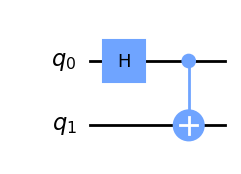

In [2]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw('mpl')

``QuantumCircuit``によって構築された状態を状態ベクトル表記で得るには、``quantum_info``モジュールの``Statevector.from_instruction()``クラスメソッドを次のように使用します。

In [3]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

同様に、``DensityMatrix.from_instruction()``クラスメソッドを用いて、この同じ状態に対する密度行列表記を得ることができます。

In [4]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

予想通り、この結果は我々の計算と一致しています。また、cityscapeプロットを用いることで、密度行列を視覚化することができます。

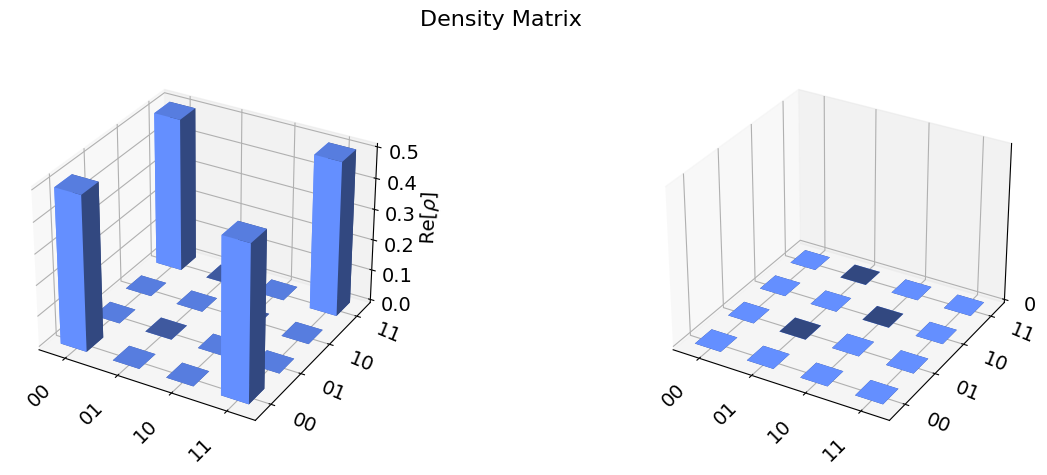

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

さて、ここまででやったことは、量子状態を表現する別の方法を示しただけで、明らかにそうすることによる利点はありません。なぜ密度行列表記が有利なのかを理解するためには、混合状態という概念を学ぶ必要があります。

### 1.1 練習問題  <a id="ex1"></a>
以下の純粋な状態について、対応する密度行列を求めよ。Qiskitを使って状態を準備し、 ``quantum_info``モジュールを使って結果を検証しなさい。
1.	$ \frac{1}{\sqrt{2}} \left ( |0\rangle - i |1\rangle \right ) $   


2.	$ \frac{1}{2}\left ( |0 0 \rangle + |0 1 \rangle + |1 0 \rangle + |1 1 \rangle \right ) $       


## 2. 混合状態 <a id="mixed"></a>

混合状態とは、異なる量子状態の統計的な集合体からなる状態を指します。つまり、純粋な状態とは異なり、混合状態は正規化された状態ベクトルの線形な重ね合わせとして表現することができないのです。まず、簡単な例でこの意味を説明しましょう。

もう一度、２量子ビットのエンタングルした状態を考えてみましょう。

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

ここでは、レジスタ$q_1$と$q_0$に関連する量子ビットをそれぞれ$A$と$B$という添え字で明示的にラベル付けしています。ここで、以下のように状態$| \psi_{AB} \rangle$を準備した直後に、レジスタ$q_1$の計測を行ったとします。

<img src="images/bell_and_measure.png" width="500"/>

ここで、次のような問いを立てることができます。レジスタ$q_1$の測定を行った直後、レジスタ$q_0$の状態はどうなるでしょうか？

[複数量子ビットともつれ状態](../ch-gates/multiple-qubits-entangled-states.ipynb#entangled)で学んだように、量子ビット$A$と$B$はエンタングルしているので、レジスタ$q_1$で ``0`` を測定すると、レジスタ$q_0$の量子状態は直ちに状態$| 0_B \rangle$に射影されることを意味しています。

$$ \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle) \quad \xrightarrow[]{\text{measure}} \quad |0_A\rangle | 0_B\rangle \quad \text{(with probability of 50%)} $$

同様に、レジスタ$q_1$で ``1`` を測定すると、$q_0$ が状態$ | 1_B \rangle $に射影されます。

$$ \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle) \quad \xrightarrow[]{\text{measure}} \quad |1_A\rangle | 1_B\rangle \quad \text{(with probability of 50%)} $$

では、一般に、$q_1$の特定の測定結果ではなく、この測定過程の任意の結果に対して、レジスタ$q_0$の終状態（図中では$\psi_B$と表示）を表現するにはどのようにすればよいのでしょうか。

測定後、$\psi_B$は$| 0_B \rangle $に確率$1/2$で、または$| 1_B \rangle $に確率$1/2$でなることが分かっていますが、$\psi_B$は$| 0_B \rangle $と$| 1_B \rangle $の線形な重ね合わせ状態に**ありません**。言い換えると、$\psi_B$は$1/\sqrt{2} \left (|0_B \rangle + | 1_B \rangle \right)$のような形の状態ベクトルとして表すことが**できません**。$\psi_B$は$| 0_B \rangle $と$| 1_B \rangle $のアンサンブル（量子重ね合わせとは異なる）であり、その結果はレジスタ$q_1$で何を測定するかによって決まり、別の記法を用いて書き下さなければなりません。

そこで、状態のアンサンブルとして表すことができる$\psi_B$を混合状態と呼ぶことにします。

$$
\left \{| \psi_{B_0} \rangle , | \psi_{B_1} \rangle \right \} = \left \{ | 0_B \rangle , | 1_B \rangle \right \},
$$ 

これらそれぞれに発生確率が設定されています。

$$ \left \{ p_0, p_1 \right \} = \left \{ 1/2, 1/2 \right \} $$

この表現は、$q_1$を測定したとき、$\psi_B$は状態$| 0_B \rangle $または状態$| 1_B \rangle $のいずれかになり、それぞれの古典的な発生確率が$1/2$であることを示しています。ケット表記は直交基底の線形結合として書ける状態ベクトルのみに対して用いており、$\psi_B$はそうではないので、状態$\psi_B$にケット表記を使わないことに注意しましょう。

一般に、n個の純粋状態のアンサンブルからなる混合状態は、結果となる状態のリストの形で表現することができます。

$$
\left \{ |\psi_j \rangle \right \}_{j = 1}^n = \left \{ | \psi_1 \rangle, | \psi_2 \rangle, \dots, | \psi_n \rangle \right \},
$$ 

ここで、各項目に対応する発生確率は次のように与えられます。

$$
\left \{ p_j \right \}_{j = 1}^n = \left \{ p_1, p_2, \dots, p_n \right \}
$$

ここで、$p_j$は系が状態$|\psi_j \rangle$にある<i>古典的</i>確率に対応し、可能な状態の総数$n$は元の[ヒルベルト空間](https://qiskit.org/textbook/ch-appendix/linear_algebra.html#Hilbert-Spaces,-Orthonormality,-and-the-Inner-Product)の次元と等しくなる必要はありません。


このような表記方法は、$\psi_B$に限らず一般的な混合状態を表記するのに有効ですが、実のところ少々不便です。混合状態は無数の純粋状態から構成することができるので、例えば、ゲートを適用したときに全体のアンサンブルがどのように発展するかを追跡するのが難しくなります。そこで、密度行列表記を用いてみましょう。

発生確率$p_j$を持つ複数の純粋状態$|\psi_j \rangle$から構成された混合状態について、その密度行列は以下のように定義されます。

$$ \rho \equiv \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

この密度行列の一般的な定義は、純粋状態でも成り立つことが容易に理解できます。純粋状態の場合、$p_j = 1$の1つの$ |\psi_j \rangle $項しか存在しません。

そこで、例に戻って、状態$\psi_B$の2つの可能な結果は$| 0_B \rangle $または$| 1_B \rangle $で、どちらも古典的な発生確率は$1/2$なので、この状態について以下の密度行列を構成できることがわかります。

$$ 
\begin{aligned}
\rho_B & = \frac{1}{2} | 0_B \rangle \langle 0_B | + \frac{1}{2} | 1_B \rangle \langle 1_B |
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} 0 & 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{aligned}
$$

ここで、アンサンブルを構成する $|\psi_j \rangle $ 状態は基底状態（$ | 0 \rangle $ や $ | 1 \rangle $）である必要はなく、次の例で示すように、これらの状態は実際には任意の正規化された純粋状態であることが重要です。

### 2.1 例 <a id="example"></a>

量子ビットを$ |0 \rangle $の状態で初期化し、アダマールゲートを作用する場合を考えてみましょう。さて、[純粋状態](#pure)で説明したシナリオとは異なり、このアダマールゲートは理想的ではありません。量子コンピュータのハードウェアのエラーにより、このアダマールゲートは80%の確率でしか次のような望みの状態を準備することができません。

$$ | \psi_1 \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) $$

残りの20%は、状態を回転させるために印加したパルスがx軸について$\frac{\pi}{6}$ラジアンだけ短すぎるか、長すぎる場合です。つまり、このアダマールゲートを使うと、以下の２つの望ましくない結果状態になってしまう可能性があります。

$$ | \psi_2 \rangle = \frac{\sqrt{3}}{2}| 0 \rangle  + \frac{1}{2} | 1 \rangle, \quad \quad | \psi_3 \rangle = \frac{1}{2} | 0 \rangle  + \frac{\sqrt{3}}{2} | 1 \rangle $$

下図は、短いパルスが10％、長いパルスが残りの10％の確率で発生した場合に、量子ビットが取り得る3つの状態をブロッホ球で表したものです。

<img src="images/noisyH_states.png" width="750"/>

私たちは、量子ビットを準備するたびにその結果を知ることはできないので、このような形の混合状態として表現することができます。

$$ \rho_H = \frac{4}{5} | \psi_1 \rangle \langle \psi_1 | + \frac{1}{10} | \psi_2 \rangle \langle \psi_2 | + \frac{1}{10} | \psi_3 \rangle \langle \psi_3 | $$

ここで、$\frac{4}{5}, \frac{1}{10}, \frac{1}{10}$の係数はそれぞれ$| \psi_1 \rangle, | \psi_2 \rangle, | \psi_3 \rangle$の状態を得る古典確率に対応します。

この3つの可能な状態ベクトルをそれぞれ$\rho$に置き換えることで、この混合物を表す密度行列を求めることができます。

$$
\begin{aligned}
& \rho_H = \frac{4}{5} \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{3}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{1}{4} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{1}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{3}{4} \end{bmatrix}
\\
\\
& \rho_H = \begin{bmatrix} \frac{1}{2} & \frac{\sqrt{3}}{20} + \frac{2}{5} \\ \frac{\sqrt{3}}{20} + \frac{2}{5} & \frac{1}{2} \end{bmatrix}
\end{aligned}
$$

Qiskit では、混合状態の密度行列を``DensityMatrix``クラスに行列値を直接入力することで定義することができます。

In [6]:
import numpy as np
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

この例から、密度行列表記が、理想的な量子状態と量子ゲートの両方に対する非理想的な（ノイズの多い）環境または外部由来の影響を捉える、有用で現実的なモデルの構築に役立つことがわかります。

### 2.2 練習問題  <a id="ex2"></a>

以下の密度行列を導出し、比較しなさい。

1. $| 0 \rangle$ と $| 1 \rangle $ が等しく重ね合わさった、純粋な１量子ビット状態。
    
    $ \rho_p = | \psi_p \rangle \langle \psi_p |, \text{ with } |\psi_p \rangle = \tfrac{1}{\sqrt{2}} \left ( | 0 \rangle + | 1 \rangle \right )$
    
    
2. $| 0 \rangle $と$| 1 \rangle $が等しく混ざりあった１量子ビット状態。
    
    $ \rho_{m} = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | $

## 3. 密度行列の性質  <a id="properties"></a>


### ユニタリー発展 <a id="evolution"></a>

この時点で、ごく自然な疑問が湧いてきます。混合状態は[ユニタリー操作](../ch-gates/proving-universality.ipynb#2.2-Unitary-and-Hermitian-matrices-)によってどのように発展するのでしょうか？　発生確率$p_j$の初期任意状態$|\psi_j \rangle$がユニタリー発展を経て状態$\hat U|\psi_j \rangle$になることは、少しの努力で示せます。とすれば、確率$\{p_j\}_{j = 1}^{n}$の正規化された状態$\{|\psi_j \rangle \}_{j = 1}^{n}$のアンサンブルからなる密度行列の発展は、次式で与えられます。

$$ 
\rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | \enspace \xrightarrow[]{\enspace \hat U \enspace} \enspace \rho' = \sum_{j} p_j \hat U |\psi_j \rangle \langle \psi_j | \hat U^{\dagger} = \hat U \rho \hat U^{\dagger}
$$

ここで、$\hat U^{\dagger}$は演算子$\hat U$の共役転置です。そこで、たとえば、次のような混合状態を考えてみましょう。

$$
\begin{align}
\rho_{0} &= \frac{1}{3} | 1 \rangle \langle 1 | + \frac{2}{3} | + \rangle \langle + |
\\
\\
&= \frac{1}{3} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} + \frac{2}{3} \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix}
\\
\\
&= \begin{bmatrix} \frac{1}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{2}{3} \end{bmatrix} 
\end{align}
$$

[Yパウリゲート](../ch-states/single-qubit-gates.ipynb#ynzgatez)を適用した後の状態$\rho_{0}'$がどうなるかに興味があるならば、次のようになります。

$$
\begin{align}
\rho_{0}' = Y \rho_{0} Y^{\dagger} &= \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{2}{3} \end{bmatrix} \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\\
\\
&= \begin{bmatrix} \frac{2}{3} & -\frac{1}{3} \\ -\frac{1}{3} & \frac{1}{3} \end{bmatrix} 
\end{align}
$$

Qiskitを使用して、ユニタリー演算子によって混合状態を発展させることができます。まず、`DensityMatrix.from_label()` メソッドを使って状態を定義してみましょう。

In [7]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

行列の`Operator`クラスを使用して、同様の方法で演算子を定義することができます。

In [8]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('Y')
array_to_latex(Y.data, prefix='Y =')

<IPython.core.display.Latex object>

最後に、`DensityMatrix.evolve()`メソッドを用いて、混合状態を発展させることができます。

In [9]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

### 行列要素 <a id="matrix_elems"></a>

状態ベクトル表記で純粋状態の場合、各ベクトル要素が確率振幅に対応することは理解できます。しかし、密度行列の要素は何を表しているのでしょうか？

もう一度、それぞれ発生確率が$\{p_j\}_{j = 1}^{n}$の純粋状態のアンサンブル$\{|\psi_j \rangle \}_{j = 1}^{n}$からなる一般の混合状態$\rho$を考えてみましょう。

$$ \rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

個々の純粋状態$ |\psi_j \rangle $は完全直交基底を構成する$\left \{ |\phi_u \rangle \right \}_{u = 1}^{m}$の線形な重ね合わせとして書くことができることが分かっています。

$$ |\psi_j \rangle = \sum_{u} \alpha_{u}^{(j)} |\phi_u \rangle $$

この式を先程の一般的な混合状態の定義に代入すると、直交基底で表現された密度行列を得ることができます。

$$ 
\rho = \sum_{j} p_j \left ( \sum_{u} \alpha_{u}^{(j)} |\phi_u \rangle \right ) \left (  \sum_{v} \left ( \alpha_{v}^{(j)} \right )^* \langle \phi_v | \right ) 
$$

係数$ p_j, \alpha_{u}^{(j)}, \left ( \alpha_{v}^{(j)} \right )^* $は単なる数なので、この表現を以下のように書き直せます。

$$
\begin{aligned}
& \rho = \sum_{u, v} \left ( \sum_{j} p_j \alpha_{u}^{(j)} \left ( \alpha_{v}^{(j)} \right )^* \right ) |\phi_u \rangle \langle \phi_v | 
\\
\\
& \rho = \sum_{u,v} \rho_{uv} |\phi_u \rangle \langle \phi_v |, 
\end{aligned}
$$

ここで、$\rho_{uv}$は$\left \{ |\phi_u \rangle \right \}_{u = 1}^{m}$基底における個々の行列要素です（括弧内の項）。行列形式で書くと、$\rho$は次式で与えられます。

$$ 
\rho = \begin{bmatrix} \rho_{11} & \rho_{12} & \dots & \rho_{1m} \\ \rho_{21} & \rho_{22} & \dots & \rho_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ \rho_{m1} & \rho_{m2} & \dots & \rho_{mm} \end{bmatrix}
$$

ここで、$\rho_{uv}$において、対角項の$\rho_{kk}$は、実際は系が特定の基底の状態$|\phi_k \rangle$にあることを観測する確率に対応していることに注目しましょう。

$$
\rho_{kk} = \sum_{j} p_j \alpha_{k}^{(j)} \left ( \alpha_{k}^{(j)} \right )^* = \sum_{j} p_j |\alpha_{k}^{(j)} |^{2}
$$

ここで、$|\alpha_{k}^{(j)} |^{2}$は与えられた基底における状態$ |\psi_j \rangle $の中から状態$|\phi_k \rangle$を観測する確率に対応するので、全ての$p_j$値を合計すると、系全体が状態$|\phi_k \rangle$にある確率の合計が求まることになります。

一方、行列の非対角項は、系の異なる基底状態間の*コヒーレンス*の尺度です。言い換えれば、純粋な重ね合わせ状態がどのように混合状態に発展（デコヒーレンス）しうるかを定量化するために用いることができます。

最後に、ある程度容易に$\rho_{uv}$の定義から$\rho_{vu}^* = \rho_{uv}$を示すことはあまり難しくなく、これは密度行列がエルミートであることを意味します（$\rho^\dagger = \rho$）。

### トレースと正定値の条件 <a id="trace_positivity"></a>

有効な純粋状態または混合状態を表す密度行列は、次の2つの条件を満たす必要があります。

1. トレースが1に等しい。

    [行列のトレース](https://en.wikipedia.org/wiki/Trace_(linear_algebra))（$\text{Tr}$と表記）が対角項の和であることを思い出すと、次が成り立つ必要があります。

    $$ \text{Tr}(\rho) =\sum_{k} \rho_{kk} = \sum_{k} \sum_{j} p_j |\alpha_{k}^{(j)} |^{2} = \sum_{j} p_j \sum_{k} |\alpha_{k}^{(j)} |^{2} = 1
    $$

    これは、すべての基底状態が正規化され、すべての確率を足し合わせると1になる必要があることから導かれます。

    $$ \sum_{k} |\alpha_{k}^{(j)} |^{2} = 1 \quad \text{and} \quad \sum_{j} p_j = 1, $$

2. 行列が[半正定値](https://en.wikipedia.org/wiki/Definite_matrix)である。
    
    状態空間の一要素である任意の状態$|\psi_q \rangle $について、以下が成り立つことを言います。
    
    $$ 
    \langle \psi_q | \rho | \psi_q \rangle = \sum_{j} p_j \langle \psi_q |\psi_j \rangle \langle \psi_j | \psi_q \rangle = \sum_{j} p_j |\langle \psi_q |\psi_j \rangle |^{2} \geq 0 
    $$

### 状態の純粋度 <a id="trace_sqr"></a>

密度行列の非常に有用な性質として、密度行列の２乗$\rho^{2}$のトレース$\text{Tr}$をとるとスカラー値$\gamma$が得られ、これが行列が表現する状態の純度の高さを示す指標として有用であることが挙げられます。正規化された状態の場合、この値は常に1以下であり、純粋状態の場合には次の等式が成り立ちます。

$$ \gamma \equiv \text{Tr}(\rho^{2}) \leq 1 $$

$$ \gamma \equiv \text{Tr}(\rho^{2}) = 1 \; \text{if pure} $$

Qiskitでは、`purity()`クラスメソッドを用いて密度行列の純度を簡単に得ることができます。例えば、純粋な状態$| + \rangle$の場合、純度は1であることが期待されます。

In [10]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


また、$\rho_m = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | $のような混合状態の場合、純度は1未満になると予想されます。

In [11]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

<IPython.core.display.Latex object>

State purity:  0.5


### 非一意性 <a id="non_uniqueness"></a>

密度行列を基底状態のアンサンブルで表現することの欠点の1つは、その結果が一意でないことです。例えば、次の2つの混合状態を考えてみましょう。

$$
\rho_{m1} = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | \quad \text{and} \quad \rho_{m2} = \frac{1}{2} | + \rangle \langle + | + \frac{1}{2} | - \rangle \langle - | 
$$

これらは明らかに異なる純粋状態の混合物であるが、$\rho_{m2}$を計算基底で表現すると、次のようになります。

$$ 
\begin{aligned}
\rho_{m2} & = \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle + | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | + \langle 1 | \right ) \right ) + \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle - | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | - \langle 1 | \right ) \right )
\\
\\
& = \frac{1}{4} \left ( | 0 \rangle \langle 0 | + | 0 \rangle \langle 1 | + | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right ) + \frac{1}{4} \left ( | 0 \rangle \langle 0 | - | 0 \rangle \langle 1 | - | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right )
\\
\\
& = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 |,
\end{aligned}
$$

これは$\rho_{m1}$と同じです。ある特定の系について密度行列表記だけを見て結論を出さないようにするため、同じ密度行列で様々な量子状態のアンサンブルが表現できることを理解することは重要です。例えば、$\rho_{m1}$で記述された系から量子状態をサンプリングすると、$\rho_{m2}$をサンプリングした場合とは異なる状態（$|0 \rangle $や$|1 \rangle $と$|+ \rangle $や$|- \rangle $）が出てきます。したがって、これらの密度行列は測定時の$\rho_{m1}$と$\rho_{m2}$の結果の確率を正しく捉えていますが、系の詳細を理解する必要がある場合は、この表現を使用する際に注意が必要です。

## 4. 縮約密度行列  <a id="reduced"></a>

密度行列表記を用いるもう一つの利点は、複合系を扱う場合、各部分系の状態を、たとえそれらがエンタングルしていたとしても抽出する方法を実際に提供してくれることです。これは、縮約密度行列と呼ばれるもので行うことができます。

部分系$A$と$B$からなる量子系を考え、この系が密度行列$\rho_{AB}$で完全に記述されるものとします。このとき、部分系$A$の縮約密度行列は次の式で与えられます。

$$ \rho_{A} = \text{Tr}_B(\rho_{AB}), $$

ここで、$\text{Tr}_B$は部分トレースと呼ばれる操作であり、次のように定義されます。

$$
\text{Tr}_B \left (| \xi_u \rangle \langle \xi_v | \otimes | \chi_u \rangle \langle \chi_v | \right ) \equiv | \xi_u \rangle \langle \xi_v | \text{ Tr} \left ( | \chi_u \rangle \langle \chi_v | \right )
$$

$| \xi_u \rangle $と$| \xi_v \rangle $は$A$の部分空間における任意の状態、$| \chi_u \rangle $と$| \chi_v \rangle $は$B$の部分空間における任意の状態です。$\text{Tr}$は標準的なトレース操作で、２つの任意の状態に対して$\text{Tr} \left ( | \chi_u \rangle \langle \chi_v | \right ) = \langle \chi_v |\chi_u \rangle $となります。同様に、$A$上の部分トレースを用いて部分系$B$の縮約密度行列を計算することができます。

$$
\text{Tr}_A \left (| \xi_u \rangle \langle \xi_v | \otimes | \chi_u \rangle \langle \chi_v | \right ) \equiv \text{Tr} \left ( | \xi_u \rangle \langle \xi_v | \right ) | \chi_u \rangle \langle \chi_v | 
$$

例として、純粋なエンタングル状態をもう一度考えてみましょう。

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

この場合、系は基底ベクトルが$ \left \{ |\xi_1 \rangle, |\xi_2 \rangle \right \} = \{ | 0_A \rangle, | 1_A \rangle \}$である１量子ビットの部分系$A$と、基底ベクトルが$ \left \{ |\chi_1 \rangle, |\chi_2 \rangle \right \} = \{ | 0_B \rangle, | 1_B \rangle \}$である１量子ビットの部分系$B$で構成されていることがわかります。この系は分離不可能であることがわかります（すなわち、$| \chi_{AB} \rangle \neq |\chi_{A}\rangle \otimes |\chi_{B}\rangle$）が、縮約密度行列を用いることにより、部分系$A$と$B$について以下のように完全に記述することが可能であることがわかります。

状態$| \psi_{AB} \rangle$の密度行列は、基底ベクトルの外積で次のように表すことができます。

$$
\rho_{AB} = | \psi_{AB} \rangle \langle \psi_{AB} | =  \frac{1}{2} \left [ | 0_A 0_B \rangle \langle 0_A 0_B | + | 0_A 0_B \rangle \langle 1_A 1_B | + | 1_A 1_B \rangle \langle 0_A 0_B | + | 1_A 1_B \rangle \langle 1_A 1_B | \right ]
$$

ここで、例えば部分系$B$の縮約密度行列を計算すると、次のようになります。

$$
\begin{aligned}
\rho_{B} & = \text{Tr}_A(\rho_{AB})
\\
\\
& = \frac{1}{2}\left [ \text{Tr}_A(| 0_A 0_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 0_A 0_B \rangle \langle 1_A 1_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 1_A 1_B |) \right ]
\\
\\
& = \frac{1}{2}\left [ \text{Tr}(| 0_A \rangle \langle 0_A |)| 0_B \rangle \langle 0_B | + \text{Tr}(| 0_A \rangle \langle 1_A |)| 0_B \rangle \langle 1_B | + \text{Tr}(| 1_A \rangle \langle 0_A |) | 1_B \rangle \langle 0_B | + \text{Tr}(| 1_A \rangle \langle 1_A |) | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ \langle 0_A | 0_A \rangle | 0_B \rangle \langle 0_B | + \langle 1_A | 0_A \rangle | 0_B \rangle \langle 1_B | + \langle 0_A | 1_A \rangle | 1_B \rangle \langle 0_B | + \langle 1_A | 1_A \rangle | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ | 0_B \rangle \langle 0_B | + | 1_B \rangle \langle 1_B | \right ]
\\
\\
&= \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} 
\end{aligned}
$$

一見すると、この結果はかなり奇妙に見えるかもしれません。純粋なエンタングル状態$|\psi_{AB} \rangle $から始めて、その一部分（部分系$B$）が混合状態$\rho_{B}$であることを計算しました。しかし、上記の[２章](#mixed)で示した最初の例に戻ると、$B$の縮約密度行列を計算した結果は、量子ビット$A$に対して測定を行ったときの$\psi_B$として得た表現と等価であることが分かります。つまり、縮約密度行列$\rho_{B}$は、部分系$A$の測定結果を平均化したときに得られる部分系$B$の統計的な結果を記述する方法であると結論づけることができます。これが、部分系$A$を「トレースアウトする」ということなのです。

これまで二分割した系に対する部分トレースの概念を説明してきましたが、この考えを多分割した系にも一般化できることは述べておくべきでしょう。

Qiskit では、``partial_trace()``関数を用いて、複合系の密度行列と、トレースする部分系のリストを渡すことにより、系の縮約密度行列を容易に得ることができます。

In [12]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

この例では、$\rho_A$と$\rho_B$が等しいですが、常に等しいとは限りません。

### 4.1 練習問題  <a id="ex4"></a>
以下の各複合状態について、縮約密度行列を計算しなさい。

1. 純粋状態：$ |\psi_{pr} \rangle = \frac{1}{2} \left ( | 00 \rangle + | 01 \rangle + | 10 \rangle + | 11 \rangle \right )$


2. 混合状態：$ \rho_{mr} = \frac{1}{4} | \Phi^+ \rangle \langle \Phi^+ | + \frac{3}{4} | \Phi^- \rangle \langle \Phi^- |$ （$| \Phi^+ \rangle$と$| \Phi^- \rangle$は以下のようなベル状態を表す）

    $| \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle + |11 \rangle \right ) $

    $| \Phi^- \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle - |11 \rangle \right ) $


## 5. ブロッホ球における混合状態  <a id="bloch"></a>

[量子ビット状態を表現する](../ch-states/representing-qubit-states.ipynb#bloch-sphere)の章では、量子ビットの状態ベクトルをブロッホ球表現を使って視覚化する方法について学びました。確率振幅を天頂角$\theta$と方位角$\varphi$の関数としてパラメータ化すると、任意の正規化された単一量子ビット状態は次のように表現されます。

$$ 
|q \rangle = \cos\left(\frac{\theta}{2} \right ) | 0 \rangle + e^{i\varphi}\sin \left(\frac{\theta}{2} \right ) | 1 \rangle.
$$

したがって、量子ビットは原点から単位球面へ伸びるベクトルとして表現でき、その向きはこれら２つの角によって決定されます。

このような状態の幾何学的解釈は、混合状態も含むように一般化することができます。これは、単一量子ビット状態の密度行列を次のような形で展開できることを利用したものです。

$$ 
\begin{align}
& \rho = \frac{1}{2} \left ( \hat I + \vec r \cdot \hat{ \vec \sigma} \right )
\\
\\
& \rho = \frac{1}{2} \hat I + \frac{1}{2} r_x \hat \sigma_x + \frac{1}{2} r_y \hat \sigma_y + \frac{1}{2} r_z \hat \sigma_z, 
\end{align}
$$

ここで$\hat I$は単位行列、$\hat \sigma_x, \hat \sigma_y, \hat \sigma_z $はそれぞれ$X, Y, Z$[パウリ行列](../ch-appendix/linear_algebra.ipynb)を表します。

$$
\hat I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix},
\quad
\hat \sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix},
\quad
\hat \sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix},
\quad
\hat \sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$r_x$、$r_y$、$r_z$の係数は、ブロッホベクトル$\vec r$と呼ばれるものの成分に相当します。これは、実はブロッホ球の中の混合状態を表すベクトルです。この行列を$\rho$の式に置き換えて簡略化すると、次のようになります。

$$
\rho = \frac{1}{2} \begin{bmatrix} 1 + r_z & r_x - i r_y \\ r_x + i r_y & 1 - r_z \end{bmatrix} 
$$

第2章の[例](#example)で求めた密度行列についてもう一度考えてみましょう。

$$
\rho_H = \begin{bmatrix} \frac{1}{2} & \frac{\sqrt{3}}{20} + \frac{2}{5} \\ \frac{\sqrt{3}}{20} + \frac{2}{5} & \frac{1}{2} \end{bmatrix}
$$

この場合については、次のようになることが容易に理解できます。

$$ r_x = 2 \left(\frac{\sqrt{3}}{20} + \frac{2}{5} \right), \quad r_y = 0, \quad r_z = 0 $$

これは、ブロッホ球において、$\rho_H$は原点からx軸の正の方向に伸びるベクトル$\vec r$で表され、その長さが$ r_x \approx 0.973 $であることを意味します。

Qiskitでは、 ``plot_bloch_multivector()`` 関数を用いて、混合状態の密度行列をブロッホ球にプロットすることができます。

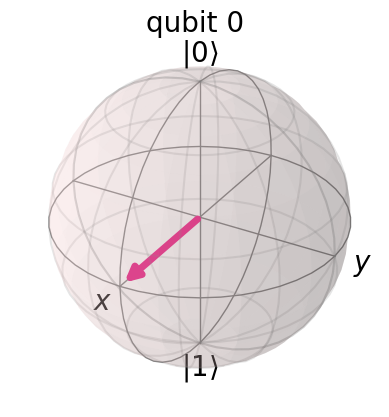

In [13]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H.data)

予想通り、x軸の正の方向に伸びる、１より若干短いベクトルが得られました。これは、この状態がノイズに邪魔されて純粋でないことを表現するのに非常に便利な方法です。例で与えられたように、可能な３つの純粋状態（$\psi_1, \psi_2, \psi_3 $）をそれぞれ３つのブロッホ球で表現するのではなく、１つのブロッホベクトルでノイズのある状態を表現することができるのです。

最後のシナリオとして、複数のブロッホ球を用いて複数量子ビット状態を可視化することが考えられます。以前、[縮約密度行列](#reduced)を使うことで、複合状態を構成する個々の部分の表現を、たとえ状態がエンタングルしていたとしても実際に見つけることができることを学びました。例えば、次のような部分的にエンタングルした状態を考えてみましょう。

$$
| \psi_{CD} \rangle = \frac{1}{2\sqrt{2}}\left ( \sqrt{3} | 0_C0_D \rangle + | 0_C1_D \rangle + | 1_C0_D \rangle + \sqrt{3} | 1_C1_D \rangle \right ).
$$

ここで、$| 0_C0_D \rangle $と$| 1_C1_D \rangle $は同じ発生確率を持ちますが、それらの状態は$ | 0_C1_D \rangle $と$| 1_C0_D \rangle$より3倍の確率で発生します。エンタングルした状態であるため、分離不可能（すなわち、$| \psi_{CD} \rangle \neq |\psi_{C}\rangle \otimes |\psi_{D}\rangle$）であり、この状態は２個の個別のブロッホ球の単位ベクトルで表現できないことがわかっています。しかし、$C$と$D$をそれぞれの縮約密度行列$\rho_C$と$\rho_D$で表現すると、複合状態をそれぞれ２つのブロッホベクトルで可視化することができます。

Qiskitでは、状態$| \psi_{CD} \rangle $を以下のような量子回路で生成することができます。

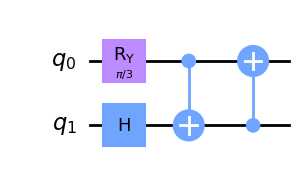

In [14]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw('mpl')

In [15]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

<IPython.core.display.Latex object>

あるいは、この状態を密度行列$\rho_{CD} = | \psi_{CD} \rangle \langle \psi_{CD} |$として表すこともできます。

In [16]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

そして、今度は対応する部分系$C$と$D$の密度行列を求めることができます。

In [17]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])

display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        rho_C.draw('latex', prefix=" \\rho_{C} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

これらの縮約密度行列には、それぞれブロッホベクトルが関連付けられており、その成分は以下の通りです。

$$ r_x \approx 0.86602, \quad r_y = 0, \quad r_z = 0 $$

そこで、Qiskitの``plot_bloch_multivector()``関数を用いて複合状態$\rho_{CD}$をプロットしてみると、これらの縮約密度行列$\rho_C$と$\rho_D$をそれぞれ正しく表現した２つのブロッホベクトルが得られます。

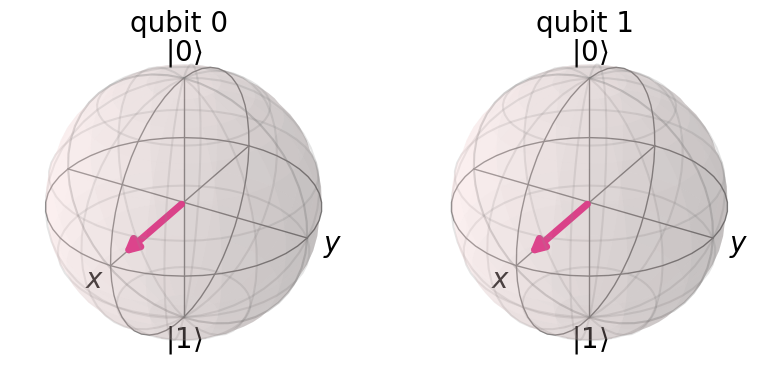

In [18]:
plot_bloch_multivector(rho_CD.data)

複数量子ビット状態のブロッホベクトル表現を理解することで、２量子ビットの最大エンタングル状態をブロッホ球にプロットしようとすると、なぜ空のプロットが得られるかがわかります。次のような状態

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

の縮約密度行列は、

$$ 
\rho_A = \rho_B = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \frac{1}{2} \hat I
$$

であり、ブロッホベクトルの成分$r_x, r_y, r_z$がすべて０であることがわかります。したがって、$\rho_A$と$\rho_B$は実際には長さ０の$\vec r $ベクトルを持ち、球の原点における点で表されます。

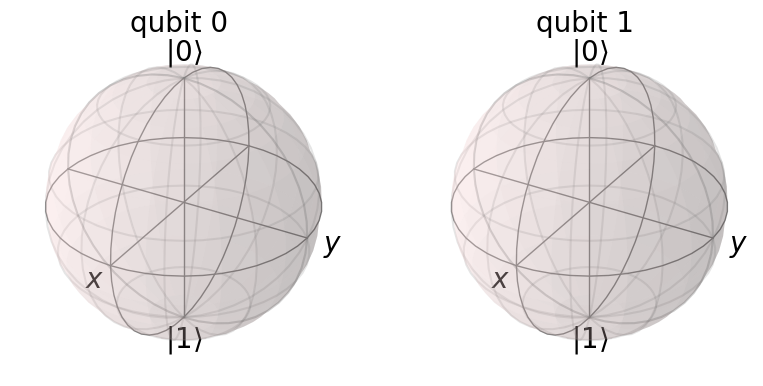

In [19]:
plot_bloch_multivector(rho_AB.data)

複数量子ビットのエンタングル状態をブロッホ球で可視化することで、量子系に関する直感的な理解が得られますが、プロットしているのは各部分系の縮約密度行列のブロッホベクトルであり、全体としての状態ではないことを覚えておくことが重要です。密度行列は[一意ではない](#non_uniqueness)ので、異なる量子状態でも同じ表現になることがあります。例えば、４つのベル状態$\tfrac{|00 \rangle + |11 \rangle}{\sqrt{2}}$, $\tfrac{|00 \rangle - |11 \rangle}{\sqrt{2}}$, $\tfrac{|01 \rangle + |10 \rangle}{\sqrt{2}}$, and $\tfrac{|01 \rangle - |10 \rangle}{\sqrt{2}}$の縮約密度行列はすべて同じ複数のベクトルを用いたブロッホ表現になります（上のプロットと同じです）。したがって、この可視化は[q-sphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html)のような他の複数量子ビット可視化手法を置き換えるものとしてではなく、補完するものとして使用する必要があります。

## 6. 参考文献  <a id="references"></a>

[1] Nielsen, M. A., & Chuang, I. _Quantum Computation and Quantum Information,_ 2002.

[2] Benenti, G., Casati, G., & Strini, G. _Principles of Quantum Computation and Information-Volume II: Basic Tools and Special Topics,_ 2007.

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table